## Calibración a 48H

Number of pixels to remove borders: 17
Number of images detected: 9
Base mean pixel: [42015]


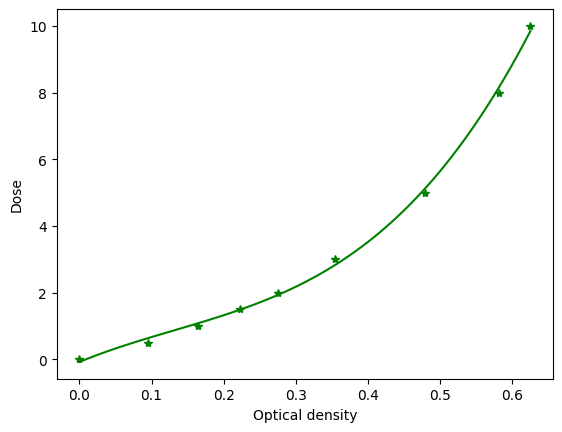

<Axes: xlabel='Optical density', ylabel='Dose'>

In [1]:
#from Dosepy.tools.image import load
from image import load
from pathlib import Path

# Dosis usadas para irradiación
imparted_doses = [0, 0.5, 1, 1.5, 2, 3, 5, 8, 10]

# Lectura de archivo con películas para calibración
file_path = Path("/home/luis/Downloads") / "POS48_1.tif"  # Office PC
#file_path_sin = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif" # Personal laptop
cal_image = load(file_path, for_calib = True)

# Obtener curva de calibración
cal = cal_image.get_calibration(doses = imparted_doses, channel = "G", field_in_film = True)
cal.plot(color = 'green')


## Verificación

Number of pixels to remove borders: 17
Number of images detected: 3


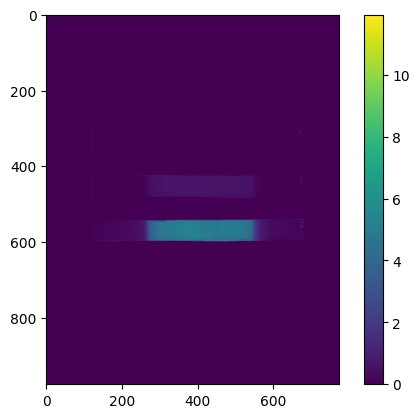

In [2]:
#Lectura de archivo
verif_path = Path("/home/luis/Downloads") / "VERIFICACION_1.tif"  # Office PC
#file_path_sin = Path("/home/luis/Dosepy/src/Dosepy/data") / "PRUEBA_LUIS.tif" # Personal laptop
verif = load(verif_path, for_calib = True)

dose_img = verif.to_dose(cal)
#dose_img_con = inferir_img.to_dose(cal_agua)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=1)

# plot and save the
# color "mappable" object returned by ax1.imshow
pos = ax.imshow(dose_img)

# add the colorbar using the figure's method,
# telling which mappable we're talking about and
# which axes object it should be near
fig.colorbar(pos, ax=ax)


Number of pixels to remove borders: 17
Number of images detected: 3
Base mean pixel: [41970]


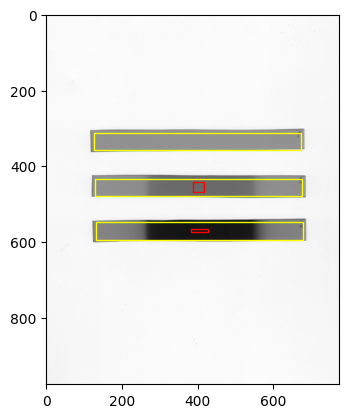

Dosis: [0.         0.83092168 5.09465675]


In [3]:
import numpy as np
from calibration import polynomial_g3

mean_pixel, _ = verif.get_stat(ch = "G", field_in_film = True, ar = 0.35, show = True)
mean_pixel = sorted(mean_pixel, reverse = True)
#mean_pixel

optical_density = -np.log10(np.array(mean_pixel)/mean_pixel[0])

dosis_from_fit = polynomial_g3(optical_density, *cal.popt)
dosis_from_fit[dosis_from_fit < 0] = 0 # Remove doses < 0

print(f"Dosis: {dosis_from_fit}")


In [ ]:
#from tifffile import imwrite
import imageio.v3 as iio
#%matplotlib qt
#from imageio.plugins.tifffile_v3.TifffilePlugin import write
#import imageio.v3 as iioTifffilePlugin.write
#imwrite('temp.tif', data, photometric='rgb')

data = np.int64(dose_img*100) # Gy to cGy

np_tif = data.astype(np.uint16)
png_encoded = iio.imwrite("<bytes>", np_tif, extension=".tif")
#np_tif
#type(png_encoded)

In [ ]:
with open('test.tif', 'wb') as f: 
    f.write(png_encoded)

In [ ]:
%matplotlib qt

In [ ]:
plt.imshow(dose_img)

In [ ]:
import matplotlib.pyplot as plt

fig, (ax_1, ax_2, ax_3) = plt.subplots(ncols=3, figsize=(11, 4))
#ax = axes.ravel()
#ax_1 = plt.subplot(1, 2, 1)
#ax_2 = plt.subplot(1, 2, 2)

cal_1.plot(color = 'red', ax = ax_1, show = False)
ax_1.set_title("Primer set")
cal_2.plot(color = 'green', ax = ax_2, show = False)
ax_2.set_title("Segundo set")

cal_1.plot(color = 'red', ax = ax_3, show = False)
cal_2.plot(color = 'green', ax = ax_3, show = False)

plt.show()